In [1]:
# Import libraries
import os
import sys
import pandas as pd

# Add scripts path to sys.path
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts'))
if scripts_path not in sys.path:
    sys.path.append(scripts_path)
from eda import EDAAnalyzer

#

In [2]:
RAW_DATA_DIR = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'raw'))
CLEANED_DATA_DIR = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'cleaned'))
reports_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'reports'))
os.makedirs(CLEANED_DATA_DIR, exist_ok=True)

raw_files = [os.path.join(RAW_DATA_DIR, f) for f in os.listdir(RAW_DATA_DIR) if f.endswith('.csv')]
print("Raw files found:", raw_files)

Raw files found: ['d:\\KAIM\\End-to-End-Insurance-Risk-Analytics-and-Predictive-Modeling\\data\\raw\\MachineLearningRating_v3.csv']


In [ ]:
#  Sample dataset
# data = {
#     'price': [500000, 750000, 350000, None, 950000, 420000, 680000, 820000],
#     'bedrooms': [3, 4, 2, 3, 5, 3, 4, 4],
#     'bathrooms': [2, 3, 1, 2, 4, 2, 3, 3],
#     'sqft': [1500, 2200, 1200, 1800, 3000, 1400, 2400, 2600],
#     'location': ['A', 'B', 'A', 'C', 'B', 'A', 'B', 'C'],
#     'year_built': [1990, 2005, 1985, 1995, 2010, 2000, 2008, 2015]
# }
# df = pd.DataFrame(data)



In [3]:
df = pd.read_csv('../data/raw/MachineLearningRating_v3.csv')

C:\Users\Eldan\AppData\Local\Temp\ipykernel_13080\4135007134.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/MachineLearningRating_v3.csv')


In [ ]:
# Initialize with custom configuration
analyzer = EDAAnalyzer(
    df=df,
    target_col='price',
    report_dir='reports',
    output_formats=['html', 'json'],
    visualization_context='notebook',
    outlier_method='percentile',
    outlier_params={'lower': 0.05, 'upper': 0.95},
    missing_value_strategy='impute',
    correlation_method='spearman'
)



2025-06-14 15:22:29,533 - EDAAnalyzer - INFO - Starting full EDA analysis at 20250614_152118
2025-06-14 15:22:55,050 - EDAAnalyzer - INFO - Saved plot: reports\20250614_152118_univariate_UnderwrittenCoverID.png


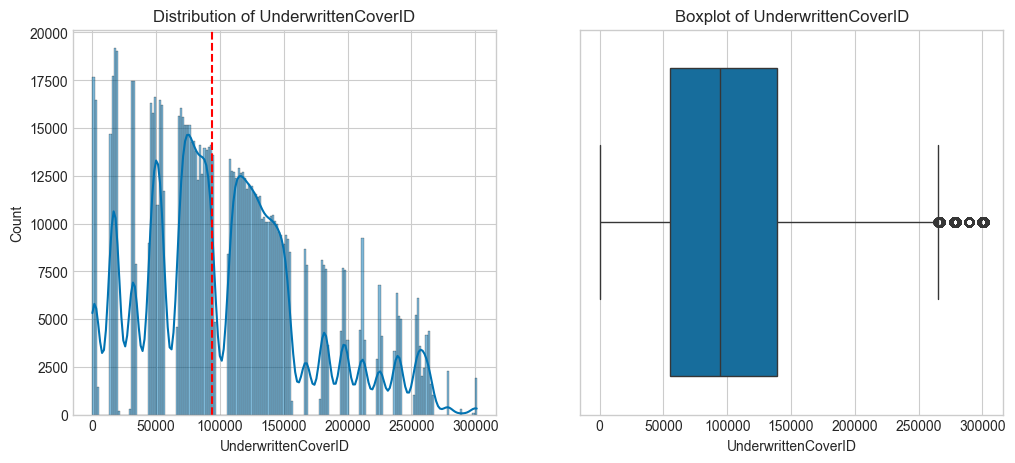

2025-06-14 15:23:08,817 - EDAAnalyzer - INFO - Saved plot: reports\20250614_152118_univariate_PolicyID.png


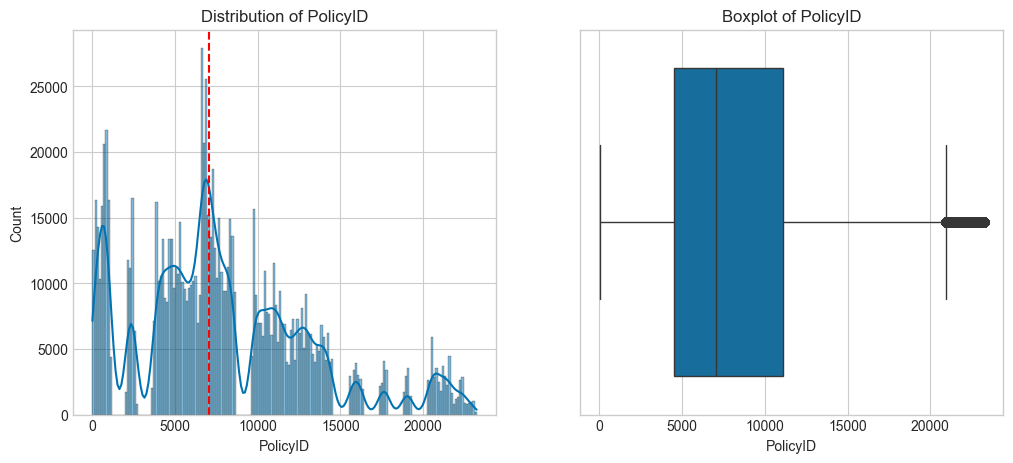

2025-06-14 15:23:21,141 - EDAAnalyzer - INFO - Saved plot: reports\20250614_152118_univariate_PostalCode.png


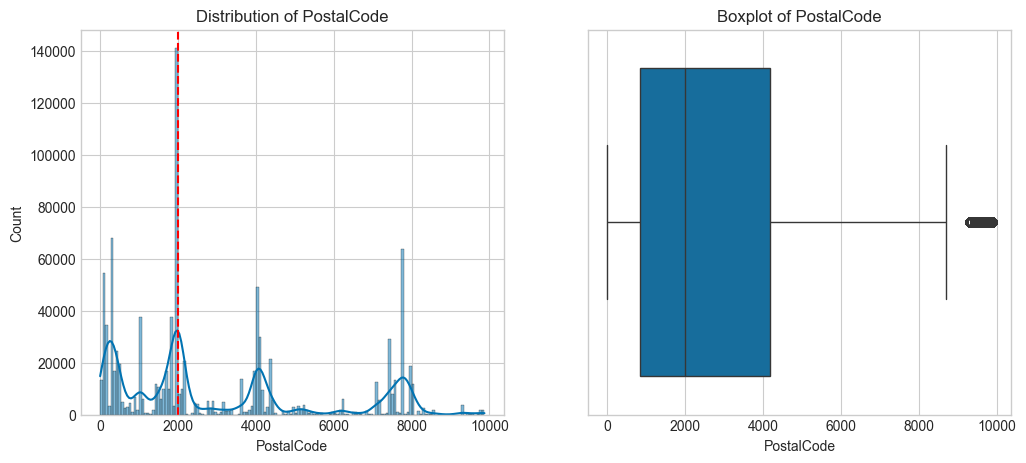

: 

In [ ]:
# Run full analysis
report = analyzer.full_analysis()



In [ ]:
# Clean data with custom strategies
cleaned_df = analyzer.clean_data(
    handle_outliers='cap',
    handle_skewness=True
)

# Save cleaned data
analyzer.save_cleaned_data('../data/processed/cleaned_mlrating.csv')

#

In [ ]:
# Access visualizations in notebook
display(analyzer.plots['univariate_price'])
display(analyzer.plots['correlation_matrix'])



In [ ]:
# Get recommendations from report
print("Key Recommendations:")
print(analyzer.report_data.get('recommendations', []))